In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
def get_label(file_path):
    return tf.strings.split(file_path,os.path.sep)[-2]

In [3]:
def image_process(file_path):
    label=get_label(file_path)
    img=tf.io.read_file(file_path)
    img=tf.image.decode_jpeg(img)
    img=tf.image.resize(img,[180,180])
    img=img/255
    return label,img

In [4]:
dataset=tf.data.Dataset.list_files('Desktop/Fruits Images/*/*',shuffle=False).shuffle(500).map(image_process)

In [5]:
for label,img in dataset.take(3):
    print('Label is: ',label.numpy())
    print('Img is: ',img)

Label is:  b'fresh_peaches'
Img is:  tf.Tensor(
[[[1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 [[1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 [[1.        1.        1.       ]
  [1.        1.        1.       ]
  [0.9982571 0.9982571 0.9982571]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 ...

 [[0.9860562 0.9860562 0.9860562]
  [0.9816988 0.9816988 0.9816988]
  [0.9991285 0.9991285 0.9991285]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 [[1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.     

In [6]:
len(dataset)

1655

In [7]:
image_count=len(dataset)
train_size=int(image_count*0.8)
train_dataset=dataset.take(train_size)
test_dataset=dataset.skip(train_size)

In [8]:
len(train_dataset)

1324

In [9]:
len(test_dataset)

331

In [10]:
X_train,X_test,y_train,y_test=[],[],[],[]


In [11]:
def num_label(data,X,y):
    for label,img in data:
        if label=='fresh_peaches':
            y.append(0)
        elif label=='fresh_pomegranates':
            y.append(1)
        elif label=='fresh_strawberries':
            y.append(2)
        elif label=='rotten_peaches':
            y.append(3)
        elif label=='rotten_pomegranates':
            y.append(4)
        else:
            y.append(5)
        X.append(img)

In [12]:
num_label(train_dataset,X_train,y_train)

In [13]:
y_train[:10]

[0, 1, 1, 1, 1, 1, 0, 0, 1, 0]

In [14]:
num_label(test_dataset,X_test,y_test)

In [15]:
y_test[:10]

[5, 4, 5, 3, 3, 5, 4, 5, 5, 5]

In [16]:
X_train[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [17]:
X_test[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [18]:
d=X_test[0].numpy()

In [19]:
d

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [20]:
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomZoom(0.4),
    layers.experimental.preprocessing.RandomContrast(0.4)
])

In [21]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(70,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(55,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(35,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(20,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(700,activation='relu'),
    layers.Dense(500,activation='relu'),
    layers.Dense(300,activation='relu'),
    layers.Dense(6,activation='softmax')
])

In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [24]:
model.fit(X_train,y_train,epochs=120)

Epoch 1/120
42/42 [==============================] - 107s 2s/step - loss: 1.7557 - accuracy: 0.2137
Epoch 2/120
42/42 [==============================] - 94s 2s/step - loss: 1.5375 - accuracy: 0.3437
Epoch 3/120
42/42 [==============================] - 94s 2s/step - loss: 1.4008 - accuracy: 0.4456
Epoch 4/120
42/42 [==============================] - 94s 2s/step - loss: 1.2514 - accuracy: 0.5098
Epoch 5/120
42/42 [==============================] - 94s 2s/step - loss: 1.2285 - accuracy: 0.5174
Epoch 6/120
42/42 [==============================] - 94s 2s/step - loss: 1.1165 - accuracy: 0.5702
Epoch 7/120
42/42 [==============================] - 96s 2s/step - loss: 1.1478 - accuracy: 0.5604
Epoch 8/120
42/42 [==============================] - 100s 2s/step - loss: 1.0835 - accuracy: 0.5937
Epoch 9/120
42/42 [==============================] - 93s 2s/step - loss: 0.9926 - accuracy: 0.6412
Epoch 10/120
42/42 [==============================] - 94s 2s/step - loss: 0.9334 - accuracy: 0.6601
Epoch 1

In [25]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 6s 504ms/step - loss: 0.3149 - accuracy: 0.9094


[0.31485632061958313, 0.9093655347824097]

In [26]:
y_pred=model.predict(X_test)
y_pred[:5]

11/11 [==============================] - 5s 464ms/step


array([[6.33851278e-06, 2.75450475e-06, 4.63063989e-05, 3.60244776e-05,
        2.15963678e-06, 9.99906421e-01],
       [2.30655132e-05, 2.13519466e-04, 1.17747900e-09, 1.93066165e-01,
        8.06697190e-01, 4.15474837e-08],
       [7.05393433e-08, 1.14407804e-07, 1.65513239e-03, 3.13428536e-05,
        1.85512021e-04, 9.98127878e-01],
       [1.57986637e-02, 2.13240692e-03, 5.03117192e-08, 9.82044458e-01,
        2.41003454e-05, 3.93813764e-07],
       [1.19044986e-02, 1.83170114e-03, 1.76607471e-04, 4.15292799e-01,
        5.65699637e-01, 5.09478897e-03]], dtype=float32)

In [31]:
y_predict=[]
for i in y_pred:
    b=np.argmax(i)
    y_predict.append(b)

In [32]:
y_predict[:5]

[5, 4, 5, 3, 4]

In [33]:
y_test[:5]

array([5, 4, 5, 3, 3])

In [36]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       1.00      0.87      0.93        23
           2       0.96      0.62      0.76        40
           3       0.89      0.96      0.93        53
           4       0.93      0.92      0.93        75
           5       0.88      0.98      0.93       123

    accuracy                           0.91       331
   macro avg       0.93      0.87      0.89       331
weighted avg       0.91      0.91      0.91       331



In [37]:
confusion_matrix(y_predict,y_test)

array([[ 15,   0,   0,   2,   0,   0],
       [  0,  20,   0,   0,   3,   0],
       [  1,   0,  25,   0,   0,  14],
       [  1,   0,   0,  51,   1,   0],
       [  0,   0,   0,   4,  69,   2],
       [  0,   0,   1,   0,   1, 121]], dtype=int64)

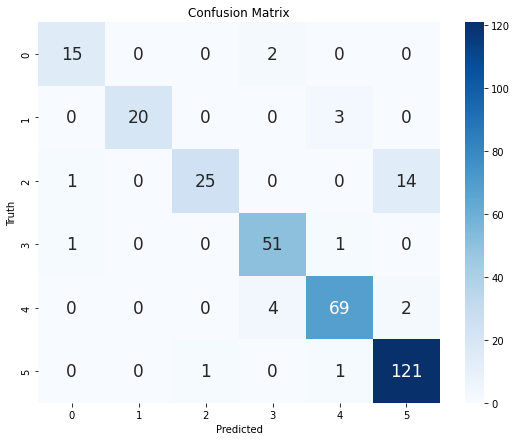

In [43]:
cm=confusion_matrix(y_predict,y_test)
plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True,annot_kws={'size':17},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()